In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

In [72]:
# Read csv file into pandas dataframe
df = pd.read_csv("weather_flu_google_8.csv")
df

,year,week,total.specimens,percent.positive,cough_medicine,flu_clinic,flu_shot,flu_vaccine,flu,influenza,...,vac_num,vac_effectiveness,all_rate,rate_0_4,rate_5_17,rate_18_49,rate_50_64,rate_65_plus,celcius_median_t,absolute_humidity
0,2010,40,54.0,0.00,55.125000,120.718085,85.207101,44.615385,17.790698,35.000000,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,13.611111,9.417646
1,2010,41,57.0,1.75,55.125000,165.691489,47.928994,55.384615,20.755814,29.000000,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,12.222222,7.021040
2,2010,42,71.0,1.41,81.156250,80.478723,76.331361,32.307692,16.802326,14.000000,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,10.277778,5.831757
3,2010,43,77.0,2.60,53.593750,89.000000,53.254438,64.615385,14.825581,14.000000,...,130.9,60,0.1,0.0,0.0,0.0,0.0,0.4,15.555556,8.617508
4,2010,44,68.0,0.00,49.000000,78.111702,37.278107,63.076923,14.825581,28.000000,...,130.9,60,0.1,0.0,0.0,0.1,0.0,0.0,6.666667,5.231198
5,2010,45,64.0,1.56,18.000000,0.000000,53.975904,19.000000,14.560000,14.222222,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,7.500000,4.961938
6,2010,46,84.0,3.57,17.485714,0.000000,42.168675,19.000000,15.600000,14.222222,...,130.9,60,0.2,0.0,0.0,0.0,0.8,0.0,9.444444,5.803234
7,2010,47,79.0,2.53,19.542857,0.000000,21.927711,20.357143,13.520000,15.238095,...,130.9,60,0.1,0.0,0.0,0.0,0.5,0.0,4.722222,3.602983
8,2010,48,97.0,3.09,16.971429,0.000000,21.927711,17.642857,8.320000,20.317460,...,130.9,60,0.1,0.0,0.0,0.0,0.0,0.7,3.055556,3.582158
9,2010,49,112.0,20.54,69.635628,0.000000,23.441860,22.000000,10.476190,12.380952,...,130.9,60,0.2,0.0,0.0,0.0,0.8,0.4,-1.944444,2.287939


In [67]:
# Created celcius tempearture and absolute humidity columns
df['celcius_median_t'] = (df['median_t'] - 32) * (5/9)
df['absolute_humidity'] = (6.112 * np.exp((17.67 * df['celcius_median_t']) / (df['celcius_median_t'] + 243.5)) * df['humidity'] * 2.1674) / (273.15 + df['celcius_median_t'])
df

,year,week,total.specimens,percent.positive,cough_medicine,flu_clinic,flu_shot,flu_vaccine,flu,influenza,...,vac_num,vac_effectiveness,all_rate,rate_0_4,rate_5_17,rate_18_49,rate_50_64,rate_65_plus,celcius_median_t,absolute_humidity
0,2010,40,54.0,0.00,55.125000,120.718085,85.207101,44.615385,17.790698,35.000000,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,13.611111,9.417646
1,2010,41,57.0,1.75,55.125000,165.691489,47.928994,55.384615,20.755814,29.000000,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,12.222222,7.021040
2,2010,42,71.0,1.41,81.156250,80.478723,76.331361,32.307692,16.802326,14.000000,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,10.277778,5.831757
3,2010,43,77.0,2.60,53.593750,89.000000,53.254438,64.615385,14.825581,14.000000,...,130.9,60,0.1,0.0,0.0,0.0,0.0,0.4,15.555556,8.617508
4,2010,44,68.0,0.00,49.000000,78.111702,37.278107,63.076923,14.825581,28.000000,...,130.9,60,0.1,0.0,0.0,0.1,0.0,0.0,6.666667,5.231198
5,2010,45,64.0,1.56,18.000000,0.000000,53.975904,19.000000,14.560000,14.222222,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,7.500000,4.961938
6,2010,46,84.0,3.57,17.485714,0.000000,42.168675,19.000000,15.600000,14.222222,...,130.9,60,0.2,0.0,0.0,0.0,0.8,0.0,9.444444,5.803234
7,2010,47,79.0,2.53,19.542857,0.000000,21.927711,20.357143,13.520000,15.238095,...,130.9,60,0.1,0.0,0.0,0.0,0.5,0.0,4.722222,3.602983
8,2010,48,97.0,3.09,16.971429,0.000000,21.927711,17.642857,8.320000,20.317460,...,130.9,60,0.1,0.0,0.0,0.0,0.0,0.7,3.055556,3.582158
9,2010,49,112.0,20.54,69.635628,0.000000,23.441860,22.000000,10.476190,12.380952,...,130.9,60,0.2,0.0,0.0,0.0,0.8,0.4,-1.944444,2.287939


In [69]:
df.to_csv('weather_flu_google_8.csv', index=False)

Relative humidity (RH) is the ratio of the amount of moisture in the air to the maxmimum amount that can be present at that specific temperature.

Text(0.5,1,'Relative Humidity Compared to Week of the Year')

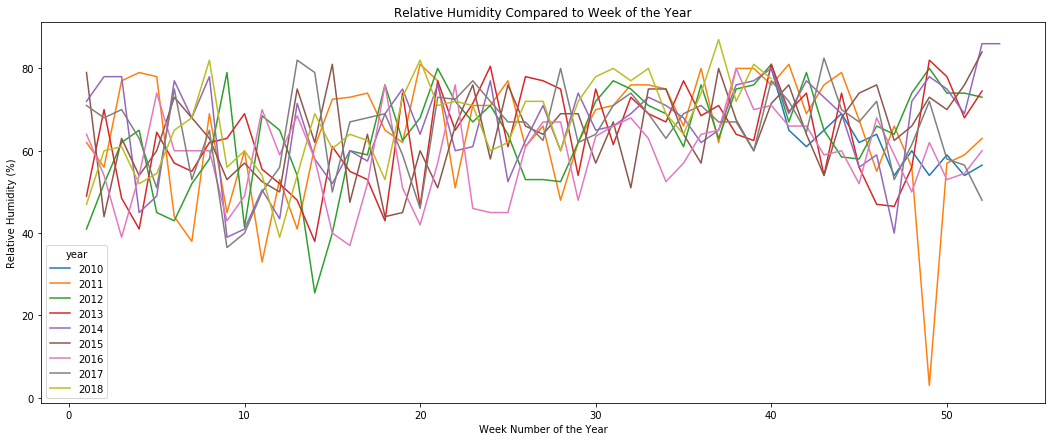

In [81]:
# Graph Humidity
df.pivot_table('humidity', index='week', columns='year').plot(figsize=(18,7))
plt.ylabel('Relative Humidity (%)');
plt.xlabel('Week Number of the Year')
plt.title('Relative Humidity Compared to Week of the Year')

Notice that there might be an error near week 48/49 for 2011. There doesn't seem to be any correlation between week number and relative humidity. Additionally, there doesn't seem to be a particular difference according to the years.

Text(0.5,1,'Median Temperature Compared to Week of the Year')

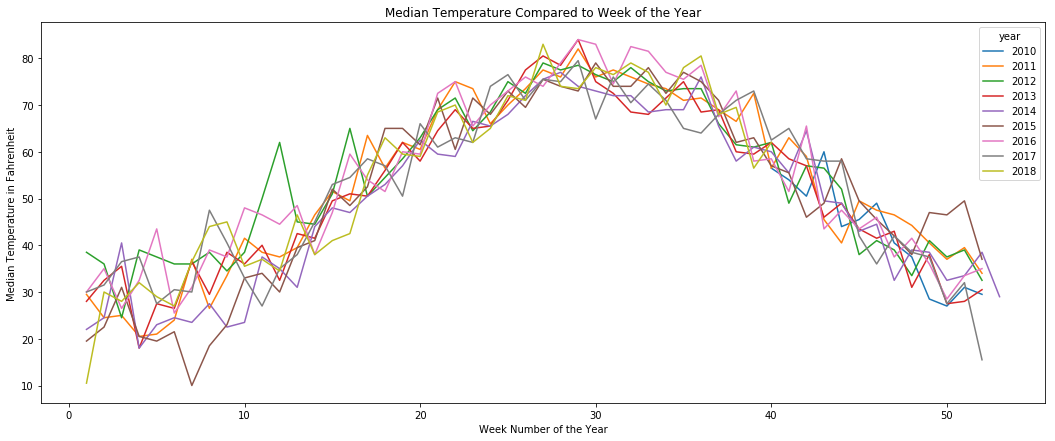

In [13]:
# Graph Mediam Temperature
df.pivot_table('median_t', index='week', columns='year').plot(figsize=(18,7))
plt.ylabel('Median Temperature in Fahrenheit');
plt.xlabel('Week Number of the Year')
plt.title('Median Temperature Compared to Week of the Year')

There is a still correlation between the week number and median tempearture with the peak occuring near week 30. Over the years there doesn't seem to be noticably increase in median temperature. Therefore we will not consider the effects of climate change in our model.

In [79]:
# Create number of cases of flu
df['num_cases'] = df['total.specimens'] * (0.01) * df['percent.positive']

In [88]:
df.head()

,year,week,total.specimens,percent.positive,cough_medicine,flu_clinic,flu_shot,flu_vaccine,flu,influenza,...,vac_effectiveness,all_rate,rate_0_4,rate_5_17,rate_18_49,rate_50_64,rate_65_plus,celcius_median_t,absolute_humidity,num_cases
0,2010,40,54.0,0.00,55.12500,120.718085,85.207101,44.615385,17.790698,35.0,...,60,0.0,0.0,0.0,0.0,0.0,0.0,13.611111,9.417646,0.0000
1,2010,41,57.0,1.75,55.12500,165.691489,47.928994,55.384615,20.755814,29.0,...,60,0.0,0.0,0.0,0.0,0.0,0.0,12.222222,7.021040,0.9975
2,2010,42,71.0,1.41,81.15625,80.478723,76.331361,32.307692,16.802326,14.0,...,60,0.0,0.0,0.0,0.0,0.0,0.0,10.277778,5.831757,1.0011
3,2010,43,77.0,2.60,53.59375,89.000000,53.254438,64.615385,14.825581,14.0,...,60,0.1,0.0,0.0,0.0,0.0,0.4,15.555556,8.617508,2.0020
4,2010,44,68.0,0.00,49.00000,78.111702,37.278107,63.076923,14.825581,28.0,...,60,0.1,0.0,0.0,0.1,0.0,0.0,6.666667,5.231198,0.0000


In [89]:
# Round number of cases to integer
df.num_cases = combined_ili_df.num_cases.round()

Text(0.5,1,'Number of Flu Cases Compared to Week of the Year')

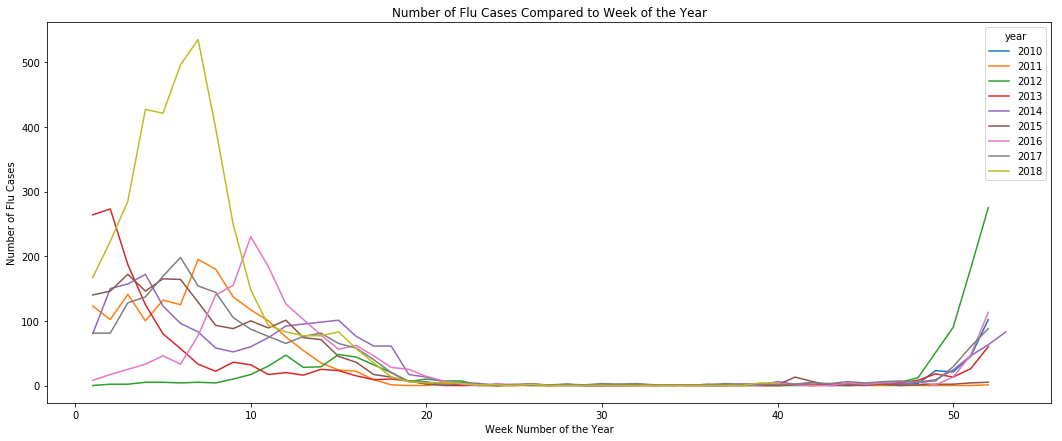

In [90]:
# Graph Number of Cases
df.pivot_table('num_cases', index='week', columns='year').plot(figsize=(18,7))
plt.ylabel('Number of Flu Cases');
plt.xlabel('Week Number of the Year')
plt.title('Number of Flu Cases Compared to Week of the Year')

Number of flu cases really high for 2018 in the beginning of the year

In [91]:
flu_df = df[['year', 'week', 'num_cases', 'median_t', 'absolute_humidity', 'total_prcp', 'vac_num']]

In [92]:
flu_df.corr()

,year,week,num_cases,median_t,absolute_humidity,total_prcp,vac_num
year,1.000000,-0.135241,0.195149,0.050321,0.061588,-0.011482,0.917187
week,-0.135241,1.000000,-0.496314,0.287632,0.270802,0.048140,0.007034
num_cases,0.195149,-0.496314,1.000000,-0.537626,-0.474297,-0.005236,0.177450
median_t,0.050321,0.287632,-0.537626,1.000000,0.941304,0.099109,0.004845
absolute_humidity,0.061588,0.270802,-0.474297,0.941304,1.000000,0.166034,0.021931
total_prcp,-0.011482,0.048140,-0.005236,0.099109,0.166034,1.000000,-0.000611
vac_num,0.917187,0.007034,0.177450,0.004845,0.021931,-0.000611,1.000000


In [93]:
flu_df.corr(method = 'spearman')

,year,week,num_cases,median_t,absolute_humidity,total_prcp,vac_num
year,1.000000,-0.129121,0.192920,0.047627,0.049639,-0.023517,0.864198
week,-0.129121,1.000000,-0.534974,0.278065,0.320662,0.029851,0.007761
num_cases,0.192920,-0.534974,1.000000,-0.748968,-0.740190,-0.022816,0.157937
median_t,0.047627,0.278065,-0.748968,1.000000,0.963171,0.034001,-0.000848
absolute_humidity,0.049639,0.320662,-0.740190,0.963171,1.000000,0.124214,0.011664
total_prcp,-0.023517,0.029851,-0.022816,0.034001,0.124214,1.000000,-0.035769
vac_num,0.864198,0.007761,0.157937,-0.000848,0.011664,-0.035769,1.000000


In [94]:
trends_df = df[['year', 'week', 'num_cases', 'influenza', 'tamiflu', 'flu_symptoms']]

In [95]:
trends_df.corr()

,year,week,num_cases,influenza,tamiflu,flu_symptoms
year,1.000000,-0.135241,0.195149,0.139716,0.242216,0.209385
week,-0.135241,1.000000,-0.496314,-0.260015,-0.369667,-0.337485
num_cases,0.195149,-0.496314,1.000000,0.740527,0.876376,0.866302
influenza,0.139716,-0.260015,0.740527,1.000000,0.794288,0.808430
tamiflu,0.242216,-0.369667,0.876376,0.794288,1.000000,0.938916
flu_symptoms,0.209385,-0.337485,0.866302,0.808430,0.938916,1.000000


In [96]:
trends_df.corr(method = 'spearman')

,year,week,num_cases,influenza,tamiflu,flu_symptoms
year,1.000000,-0.129121,0.192920,0.053653,0.163780,0.113709
week,-0.129121,1.000000,-0.534974,-0.187168,-0.397625,-0.281476
num_cases,0.192920,-0.534974,1.000000,0.499833,0.739994,0.718141
influenza,0.053653,-0.187168,0.499833,1.000000,0.477990,0.563820
tamiflu,0.163780,-0.397625,0.739994,0.477990,1.000000,0.686495
flu_symptoms,0.113709,-0.281476,0.718141,0.563820,0.686495,1.000000


In [97]:
vaccine_df = df[['year', 'week', 'num_cases', 'vac_num', 'vac_effectiveness']]

In [98]:
vaccine_df.corr()

,year,week,num_cases,vac_num,vac_effectiveness
year,1.000000,-0.135241,0.195149,0.917187,-0.495694
week,-0.135241,1.000000,-0.496314,0.007034,-0.010195
num_cases,0.195149,-0.496314,1.000000,0.177450,-0.056425
vac_num,0.917187,0.007034,0.177450,1.000000,-0.650753
vac_effectiveness,-0.495694,-0.010195,-0.056425,-0.650753,1.000000


Consider humidity of the week prior? Or month prior?

Text(0.5,1,'Google Searches for Influenza Compared to Week of the Year')

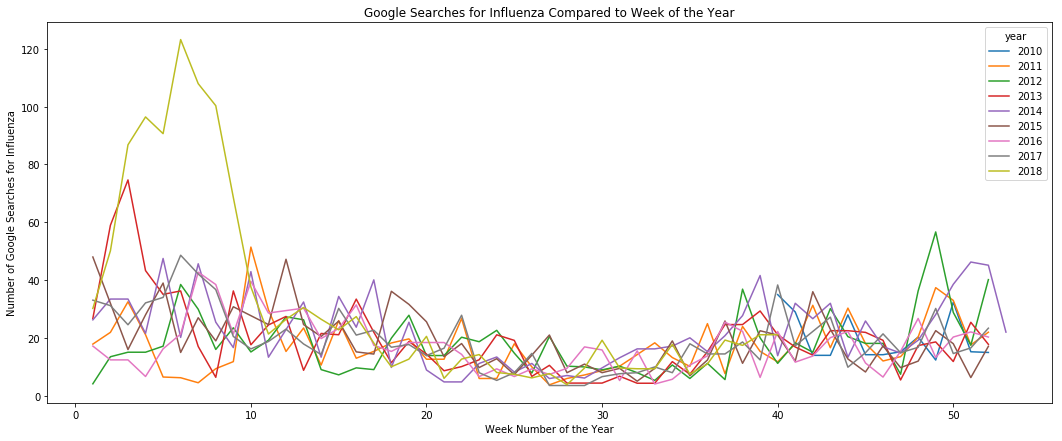

In [99]:
# Graph google search terms
df.pivot_table('influenza', index='week', columns='year').plot(figsize=(18,7))
plt.ylabel('Number of Google Searches for Influenza');
plt.xlabel('Week Number of the Year')
plt.title('Google Searches for Influenza Compared to Week of the Year')

Text(0.5,1,'Google Searches for Influenza Compared to Week of the Year')

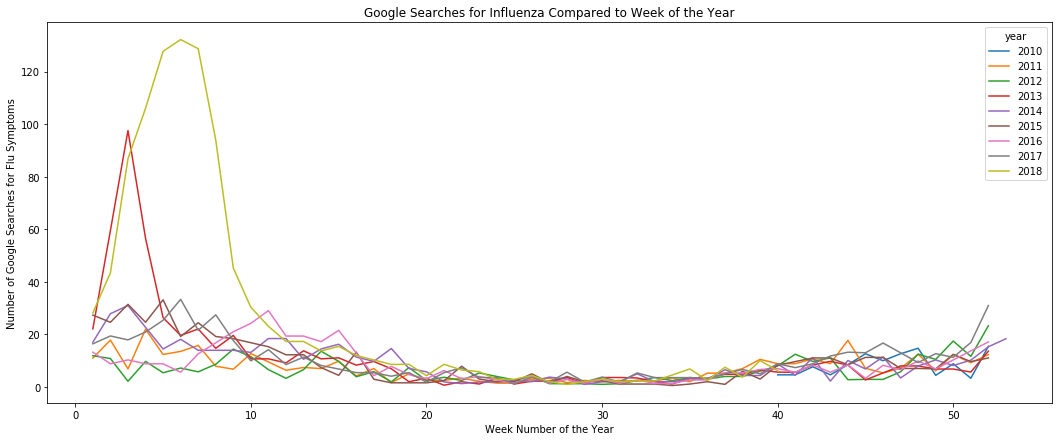

In [100]:
# Graph google search terms
df.pivot_table('flu_symptoms', index='week', columns='year').plot(figsize=(18,7))
plt.ylabel('Number of Google Searches for Flu Symptoms');
plt.xlabel('Week Number of the Year')
plt.title('Google Searches for Influenza Compared to Week of the Year')

Text(0.5,1,'Google Searches for Influenza Compared to Week of the Year')

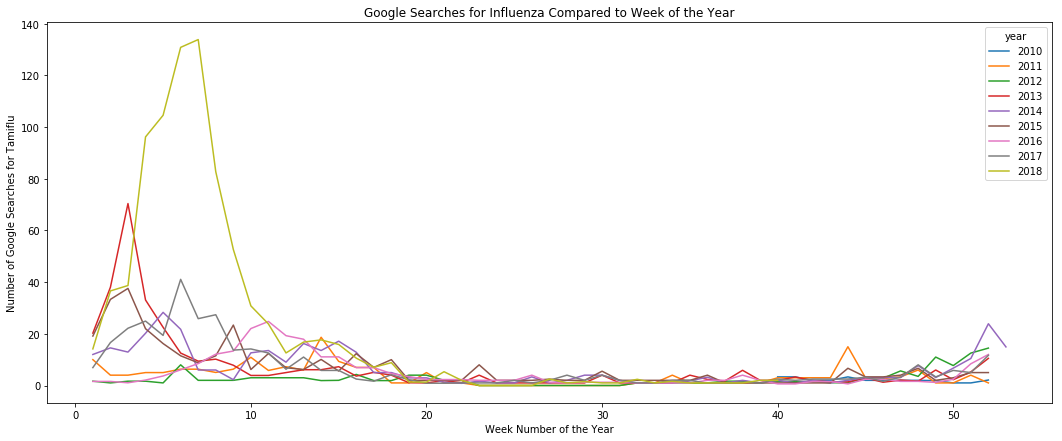

In [101]:
# Graph google search terms
df.pivot_table('tamiflu', index='week', columns='year').plot(figsize=(18,7))
plt.ylabel('Number of Google Searches for Tamiflu');
plt.xlabel('Week Number of the Year')
plt.title('Google Searches for Influenza Compared to Week of the Year')

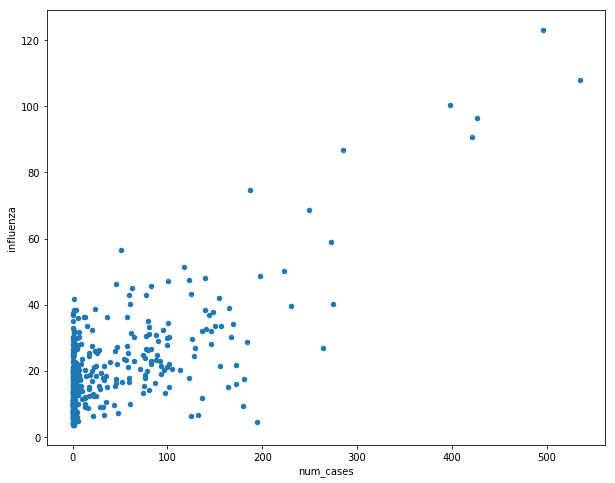

In [50]:
combined_ili_df.plot.scatter(x = 'num_cases', y = 'influenza', figsize = (10, 8))

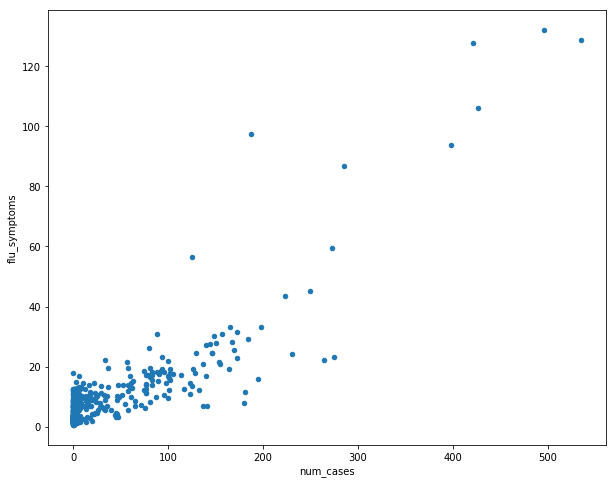

In [102]:
df.plot.scatter(x = 'num_cases', y = 'flu_symptoms', figsize = (10, 8))

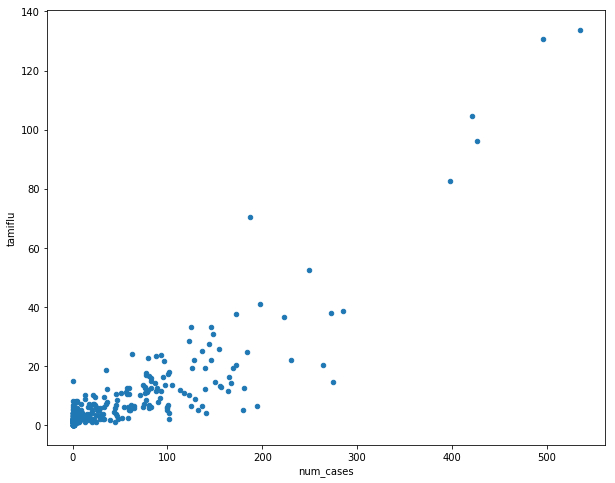

In [103]:
df.plot.scatter(x = 'num_cases', y = 'tamiflu', figsize = (10, 8))

Text(0.5,1,'Absolute Humidity Compared to Week of the Year')

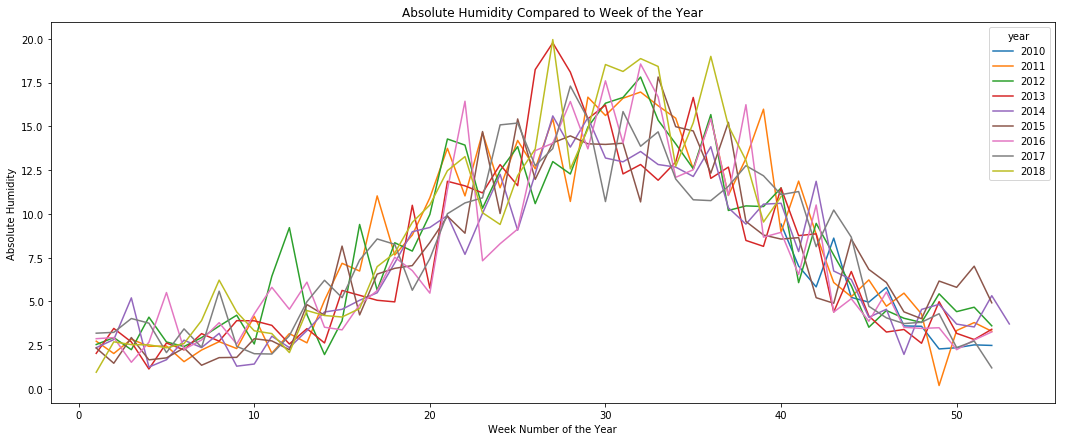

In [75]:
# Graph absolute humidity
df.pivot_table('absolute_humidity', index='week', columns='year').plot(figsize=(18,7))
plt.ylabel('Absolute Humidity');
plt.xlabel('Week Number of the Year')
plt.title('Absolute Humidity Compared to Week of the Year')

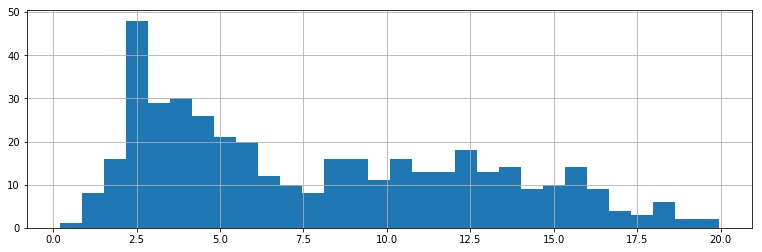

In [74]:
df.absolute_humidity.hist(bins=30, figsize=(13, 4))

In [62]:
combined_ili_df.describe()
combined_ili_df['humidity'].describe()

count    418.000000
mean      63.941388
std       11.608761
min        3.000000
25%       56.625000
50%       65.000000
75%       73.000000
max       87.000000
Name: humidity, dtype: float64

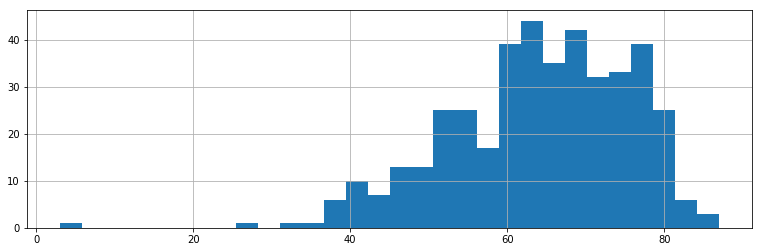

In [76]:
df.humidity.hist(bins=30, figsize=(13, 4))

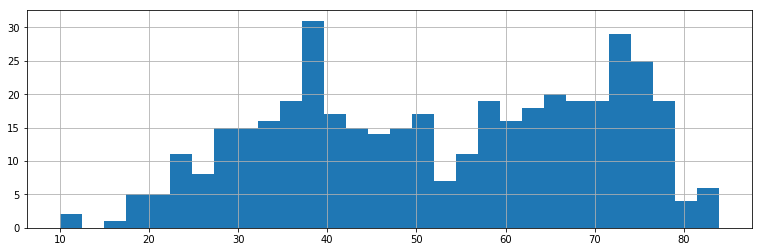

In [77]:
df.median_t.hist(bins=30, figsize=(13, 4))

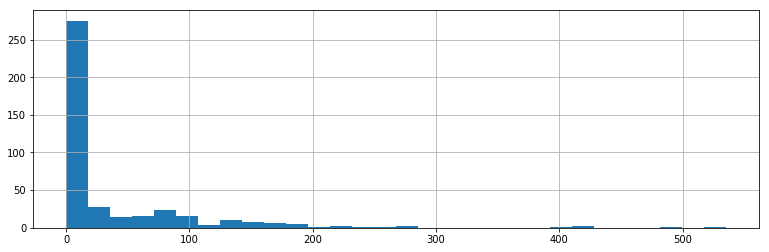

In [82]:
df['humidity'].describe()

count    418.000000
mean      63.941388
std       11.608761
min        3.000000
25%       56.625000
50%       65.000000
75%       73.000000
max       87.000000
Name: humidity, dtype: float64

In [84]:
df.nsmallest(5, 'humidity')['humidity']

61      3.0
78     25.5
23     33.0
334    36.5
289    37.0
Name: humidity, dtype: float64

In [86]:
df.iloc[61]

year                 2011.000000
week                   49.000000
total.specimens       144.000000
percent.positive        0.000000
cough_medicine         16.888889
flu_clinic             22.000000
flu_shot               23.771429
flu_vaccine            32.340426
flu                     9.529412
influenza              37.400000
oseltamivir             0.000000
relenza                 0.000000
tamiflu                 1.000000
zanamivir               0.000000
flu_symptoms            6.153846
median_tmax            51.000000
median_tmin            30.000000
median_t               40.500000
total_prcp              3.020000
humidity                3.000000
vac_num               132.100000
vac_effectiveness      47.000000
all_rate                0.100000
rate_0_4                0.000000
rate_5_17               0.000000
rate_18_49              0.000000
rate_50_64              0.000000
rate_65_plus            0.400000
celcius_median_t        4.722222
absolute_humidity       0.200166
num_cases 

In [87]:
df.iloc[60]

year                 2011.000000
week                   48.000000
total.specimens       128.000000
percent.positive        0.000000
cough_medicine         25.333333
flu_clinic             41.000000
flu_shot               26.576271
flu_vaccine            34.500000
flu                    11.255814
influenza              20.329412
oseltamivir             0.000000
relenza                 0.000000
tamiflu                 6.000000
zanamivir               0.000000
flu_symptoms           12.444444
median_tmax            55.000000
median_tmin            33.500000
median_t               44.250000
total_prcp              0.870000
humidity               56.000000
vac_num               132.100000
vac_effectiveness      47.000000
all_rate                0.000000
rate_0_4                0.000000
rate_5_17               0.000000
rate_18_49              0.000000
rate_50_64              0.000000
rate_65_plus            0.000000
celcius_median_t        6.805556
absolute_humidity       4.284195
num_cases 